Build a simple polls-only election model to predict whether a candidate will win a state from their lead in the state using FiveThirtyEight polling data from 2016 and 2020.

In [1]:
from bbai.glm import BayesianLogisticRegression1
import numpy as np
import matplotlib.pyplot as plt

## 2020 Election Model

In [2]:
# FiveThirtyEight state-wide polling data from 2020
# source https://projects.fivethirtyeight.com/polls/president-general/2020/
#
# format is <state>, <trump polling>, <biden polling>, <state winner>
data_2020 = [
    ('alabama',  57.4, 37.8, 'trump'), ('alaska', 51.2, 43.6, 'trump'),
    ('arizona',  46.1, 48.7, 'biden'), ('arkansas', 58.9, 36.2, 'trump'),
    ('california', 32.4, 61.6, 'biden'), ('colorado', 41.1, 53.6, 'biden'),
    ('connecticut',  32.4, 48.6, 'biden'), ('delaware', 34.6, 58.9, 'biden'),
    ('DC', 5.8,  90.8, 'biden'), ('florida',  46.6, 49.1, 'trump'),
    ('georgia',  47.4, 48.5, 'biden'), ('hawaii', 30.0, 64.3, 'biden'),
    ('idaho',  56.6, 38.5, 'trump'), ('illinois', 39.0, 55.0, 'biden'),
    ('indiana',  52.9, 42.0, 'trump'), ('iowa', 47.6, 46.3, 'trump'),
    ('kansas', 53.9, 41.0, 'trump'), ('kentucky', 55.6, 39.9, 'trump'),
    ('louisiana',  57.6, 37.1, 'trump'), ('maine',  40.3, 53.3, 'biden'),
    ('maryland', 31.6, 63.1, 'biden'), ('massachusetts',  28.9, 64.6, 'biden'),
    ('michigan', 43.2, 51.2, 'biden'), ('minnesota',  42.7, 51.8, 'biden'),
    ('mississippi',  55.5, 39.6, 'trump'), ('missouri', 51.6, 43.6, 'trump'),
    ('montana',  49.8, 45.4, 'trump'), ('nebraska', 52.1, 42.5, 'trump'),
    ('nevada', 44.4, 49.7, 'biden'), ('new hampshire',  42.8, 53.9, 'biden'),
    ('new jersey', 37.9, 58.4, 'biden'), ('new mexico', 42.1, 53.9, 'biden'),
    ('new york', 32.9, 62.3, 'biden'), ('north carolina', 47.1, 48.9, 'trump'),
    ('north dakota', 56.0, 38.7, 'trump'), ('ohio', 47.5, 46.8, 'trump'),
    ('oklahoma', 59.2, 36.2, 'trump'), ('oregon', 37.4, 58.7, 'biden'),
    ('pennsylvania', 45.6, 50.2, 'biden'), ('rhode island', 32.4, 62.9, 'biden'),
    ('south carolina', 51.6, 44.5, 'trump'), ('south dakota', 54.5, 39.0, 'trump'),
    ('tennessee',  55.1, 41.4, 'trump'), ('texas',  48.6, 47.4, 'trump'),
    ('utah', 51.9, 42.1, 'trump'), ('vermont',  27.8, 66.5, 'biden'),
    ('virginia', 41.9, 53.7, 'biden'), ('washington', 36.4, 59.4, 'biden'),
    ('west virginia',  62.1, 33.5, 'trump'), ('wisconsin',  43.7, 52.1, 'biden'),
    ('wyoming',  62.3, 30.8, 'trump'),
]

In [3]:
# create the dataset x, y
# where x[i] is the polling lead for a state and
# and y[i] is 1 if the leading candidate won the
# state and 0 otherwise.
def make_dataset(data):
    n = len(data)
    x = np.zeros(n)
    y = np.zeros(n)
    for i, row in enumerate(data):
        delta = row[1] - row[2]
        x[i] = np.abs(delta)
        if delta > 0:
            y[i] = row[3] == 'trump'
        else:
            y[i] = row[3] != 'trump'
    return x, y

# Fit a Bayesian logistic regression model to given data
# using a reference prior (i.e. Jeffreys prior)
def fit_model(data):
    x, y = make_dataset(data)
    model = BayesianLogisticRegression1(w_min=0.0)
    model.fit(x, y)
    return model

In [4]:
# build a model for 2020 data
model_2020 = fit_model(data_2020)

In [5]:
# compute prediction percentiles showing how likely we
# think the leading candidate will win a state when they have
# a 1% polling lead
pred = model_2020.predict(1)
percentiles = []
for pct in [.05, .25, .5, .75, .95]:
    p = pred.ppf(pct)
    percentiles.append((pct, p))
    print(pct, ':', p)

0.05 : 0.5641434904532812
0.25 : 0.5961981934320587
0.5 : 0.6295215387383791
0.75 : 0.6751733289917694
0.95 : 0.7597437053553246


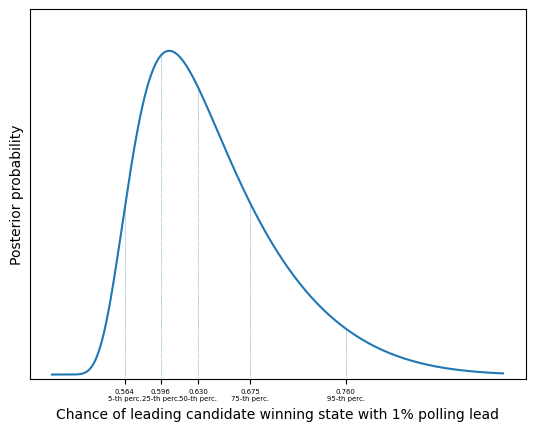

In [6]:
# Plot out the prediction PDF with percentiles
px = np.arange(0.5, .9, 0.001)
probs = [pred.pdf(pi) for pi in px]

fig, ax = plt.subplots()
ax.set_ylim(-0.1, np.max(probs) + 1)
ax.set_yticks([])
ax.set_yticklabels([])
ax.plot(px, probs)

xticks = []
for pct, pi in percentiles:
    ax.vlines(pi, -0.1, pred.pdf(pi), linestyle='dotted', linewidth=0.5)
    xticks.append(pi)

ax.set_xticks(xticks)
ax.set_xticklabels(['%.3f\n%d-th perc.' % (p, int(pct * 100)) for pct, p in percentiles], fontsize=5)
ax.set_xlabel('Chance of leading candidate winning state with 1% polling lead')
ax.set_ylabel('Posterior probability')
fig.show()

## 2016 Election Model

In [7]:
# FiveThirtyEight state-wide polling data from 2016
# source https://projects.fivethirtyeight.com/2016-election-forecast/
#
# format is <state>, <trump polling>, <biden polling>, <state winner>
data_2016 = [
    ('alabama', 55.4, 32.6, 'trump'), ('alaska', 42.1, 36.4, 'trump'),
    ('arizona', 44.4, 42.7, 'trump'), ('arkansas', 52.6, 32.4, 'trump'),
    ('california', 31.1, 54.8, 'clinton'), ('colorado', 39.7, 43.7, 'clinton'),
    ('connecticut', 35.4, 48.5, 'clinton'), ('delaware', 35.3, 48.4, 'clinton'),
    ('dc', 8.0, 78.6, 'clinton'), ('florida', 44.4, 45.7, 'trump'),
    ('georgia', 47.2, 43.5, 'trump'), ('hawaii', 28.2, 50.1, 'clinton'),
    ('idaho', 46.3, 27.7, 'trump'), ('illinois', 34.9, 49.4, 'clinton'),
    ('indiana', 47.5, 37.1, 'trump'), ('iowa', 43.5, 40.4, 'trump'),
    ('kansas', 48.0, 36.8, 'trump'), ('kentucky', 50.2, 32.6, 'trump'),
    ('louisiana', 50.0, 35.4, 'trump'), ('maine', 37.1, 45.1, 'clinton'),
    ('maryland', 29.0, 56.3, 'clinton'), ('massachusetts', 28.6, 54.1, 'clinton'),
    ('michigan', 40.4, 44.5, 'trump'), ('minnesota', 37.6, 44.9, 'clinton'),
    ('mississippi', 50.4, 37.2, 'trump'), ('missouri', 49.1, 38.8, 'trump'),
    ('montana', 47.0, 32.4, 'trump'), ('nebraska', 49.9, 32.6, 'trump'),
    ('nevada', 43.5, 44.6, 'clinton'), ('new hampshire', 40.6, 44.8, 'clinton'),
    ('new jersey', 36.9, 48.9, 'clinton'), ('new mexico', 38.1, 43.4, 'clinton'),
    ('new york', 33.3, 52.7, 'clinton'), ('north carolina', 44.4, 45.7, 'trump'),
    ('north dakota', 51.8, 28.2, 'trump'), ('ohio', 44.4, 42.8, 'trump'),
    ('oklahoma', 55.2, 30.2, 'trump'), ('oregon', 35.9, 45.6, 'clinton'),
    ('pennsylvania', 42.4, 46.3, 'trump'), ('rhode island', 33.5, 47.6, 'clinton'),
    ('south carolina', 47.1, 40.1, 'trump'), ('south dakota', 48.2, 33.9, 'trump'),
    ('tennessee', 47.4, 36.9, 'trump'), ('texas', 46.8, 39.3, 'trump'),
    ('utah', 36.3, 26.5, 'trump'), ('vermont', 23.3, 52.5, 'clinton'),
    ('virginia', 40.7, 46.6, 'clinton'), ('washington', 34.8, 48.9, 'clinton'),
    ('west virginia', 55.8, 29.2, 'trump'), ('wisconsin', 40.5, 46.4, 'trump'),
    ('wyoming', 57.1, 22.1, 'trump'),
]

In [8]:
# build a model for 2016 data
model_2016 = fit_model(data_2016)

In [9]:
# compute prediction percentiles showing how likely we
# think the leading candidate will win a state when they have
# a 1% polling lead
pred = model_2016.predict(1)
percentiles = []
for pct in [.05, .25, .5, .75, .95]:
    p = pred.ppf(pct)
    percentiles.append((pct, p))
    print(pct, ':', p)

0.05 : 0.5470823387127818
0.25 : 0.564292362110179
0.5 : 0.5792681211477082
0.75 : 0.5971895500512383
0.95 : 0.6287530887742746


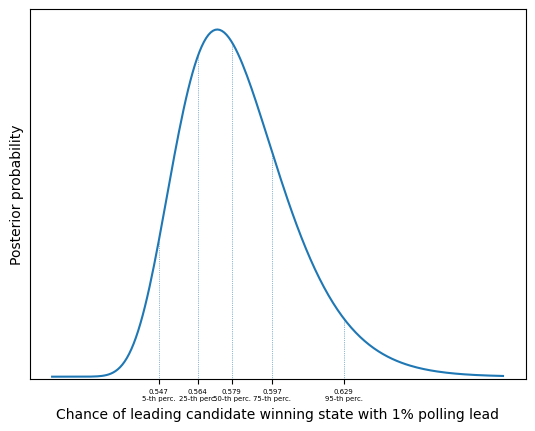

In [10]:
# Plot out the prediction PDF with percentiles
px = np.arange(0.5, .7, 0.001)
probs = [pred.pdf(pi) for pi in px]

fig, ax = plt.subplots()
ax.set_ylim(-0.1, np.max(probs) + 1)
ax.set_yticks([])
ax.set_yticklabels([])
ax.plot(px, probs)

xticks = []
for pct, pi in percentiles:
    ax.vlines(pi, -0.1, pred.pdf(pi), linestyle='dotted', linewidth=0.5)
    xticks.append(pi)

ax.set_xticks(xticks)
ax.set_xticklabels(['%.3f\n%d-th perc.' % (p, int(pct * 100)) for pct, p in percentiles], fontsize=5)
ax.set_xlabel('Chance of leading candidate winning state with 1% polling lead')
ax.set_ylabel('Posterior probability')
fig.show()

# 